In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
df = pd.read_csv('df_ny.csv')

In [4]:
df.head()

,job_title,rating,average,company,reviews,location,datepost,lat,lon,skills
0,"Junior Business Analyst, Client Services",NaN,0.0,NaN,NaN,NaN,30.0,0.000000,0.000000,"Python,SQL,R,Spark,Hive,AWS,Data-Warehouse"
1,Data Analyst,NaN,0.0,NaN,NaN,NaN,30.0,0.000000,0.000000,"SQL,R"
2,LIBOR - Project Manager / Business Analyst,4.5,0.0,Prospect 33,2.0,"New York, NY",30.0,40.712728,-74.006015,R
3,Business Analyst,4.5,0.0,Prospect 33,2.0,"New York, NY",30.0,40.712728,-74.006015,"R,Microsoft-Office"
4,"Data Analyst, PNA",3.8,0.0,New York City NYC HOUSING AUTHORITY,754.0,"Manhattan, NY",30.0,40.789624,-73.959894,R


In [8]:
df.shape

(1151, 9)

In [23]:
df.loc[df['rating'] == 0,'rating'] = np.nan
df.loc[df['average'] == 0,'average'] = np.nan
df.loc[df['reviews'] == 0,'reviews'] = np.nan
df.loc[df['datepost'] == 0,'datepost'] = np.nan
df[:10]

,job_title,rating,average,company,reviews,location,datepost,lat,lon,skills
0,"Junior Business Analyst, Client Services",NaN,NaN,NaN,NaN,NaN,30.0,0.000000,0.000000,"Python,SQL,R,Spark,Hive,AWS,Data-Warehouse"
1,Data Analyst,NaN,NaN,NaN,NaN,NaN,30.0,0.000000,0.000000,"SQL,R"
2,LIBOR - Project Manager / Business Analyst,4.5,NaN,Prospect 33,2.0,"New York, NY",30.0,40.712728,-74.006015,R
3,Business Analyst,4.5,NaN,Prospect 33,2.0,"New York, NY",30.0,40.712728,-74.006015,"R,Microsoft-Office"
4,"Data Analyst, PNA",3.8,NaN,New York City NYC HOUSING AUTHORITY,754.0,"Manhattan, NY",30.0,40.789624,-73.959894,R
5,Business Analyst,3.4,75000.0,ThoughtFocus,21.0,"New York, NY 10001",30.0,40.729825,-73.960752,NaN
6,Mortgage Data & Collateral Analyst,3.2,NaN,Global Atlantic Financial Group,23.0,"New York, NY",30.0,40.712728,-74.006015,NaN
7,Data Analyst,4.2,55000.0,UncommonGoods,174.0,"Brooklyn, NY 11220",30.0,40.650104,-73.949582,R
8,Audience Data Analyst,3.9,NaN,Dow Jones,198.0,"New York, NY 10176",30.0,40.741236,-73.356691,"Python,SQL,R,Java,Tableau,AWS,Data-Analysis"
9,Data Analyst Intern,3.5,NaN,Chexology,2.0,"New York, NY 10011",30.0,40.712728,-74.006015,R


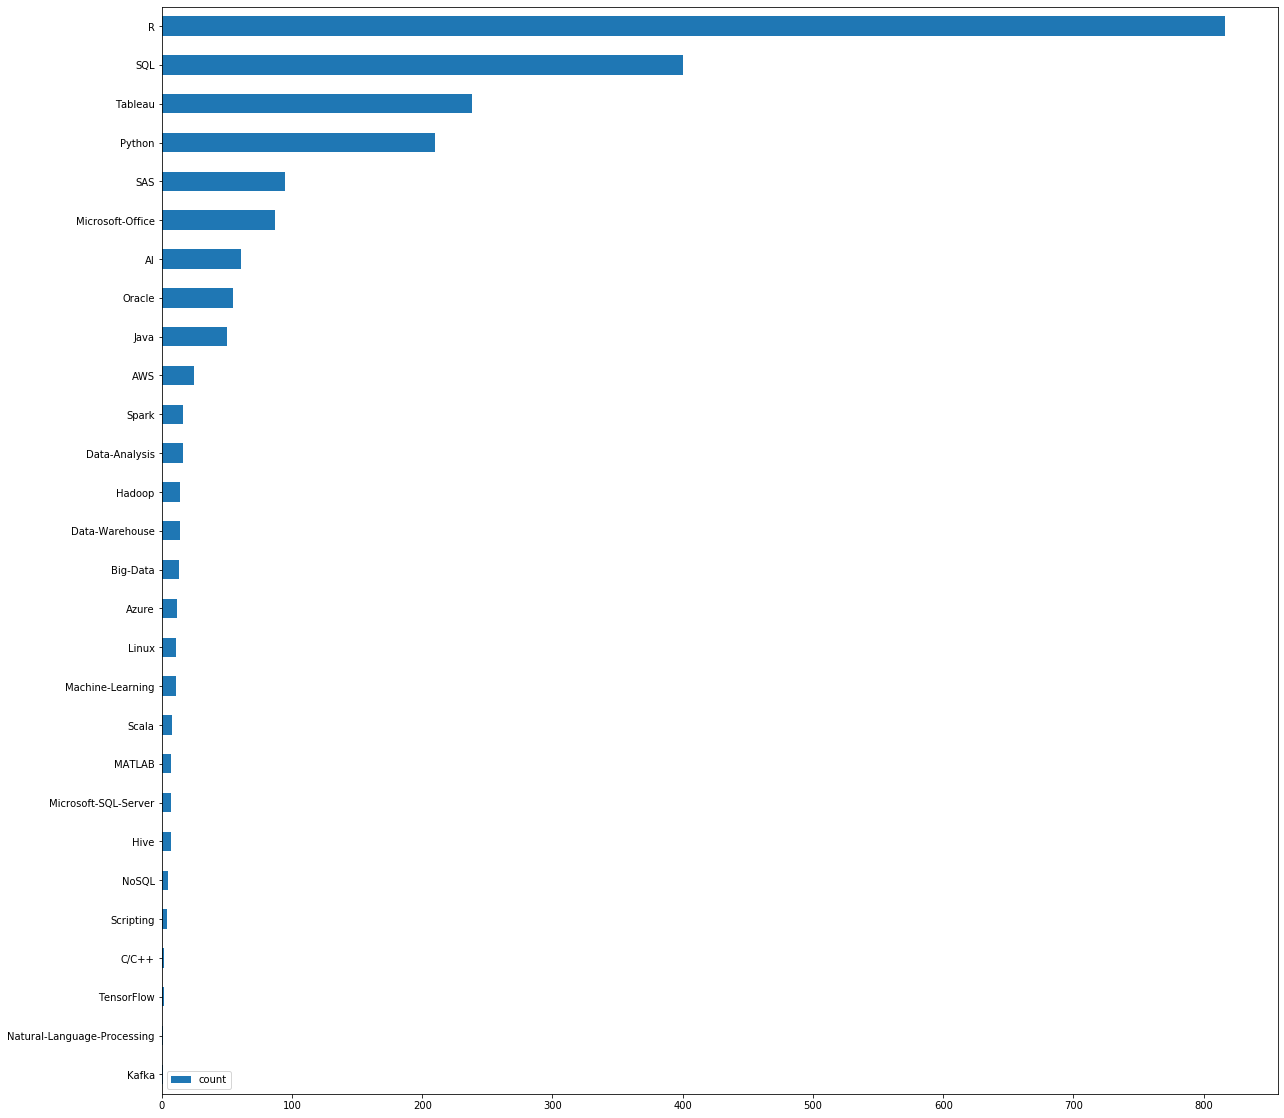

In [25]:
df_noskill = df.drop(['skills'], axis=1)
df_skill = df['skills'].str.get_dummies(sep=',')
df_skill_rank = df_skill.sum().to_frame(name='count').sort_values(by=['count'], ascending=False)[:50]
df_skill_rank.sort_values(by=['count'], ascending=True).plot.barh(figsize=(20,20))

In [26]:
df_noskill.describe(include='all')

,job_title,rating,average,company,reviews,location,datepost,lat,lon
count,1151,491.000000,57.000000,869,869.000000,869,1121.000000,1151.000000,1151.000000
unique,710,NaN,NaN,410,NaN,90,NaN,NaN,NaN
top,Business Analyst,NaN,NaN,NYC Health + Hospitals,NaN,"New York, NY",NaN,NaN,NaN
freq,80,NaN,NaN,27,NaN,309,NaN,NaN,NaN
mean,NaN,3.800000,77506.692982,NaN,170.245109,NaN,22.886708,30.679819,-55.694948
std,NaN,0.415319,26891.753366,NaN,255.053732,NaN,10.095995,17.566770,31.890321
min,NaN,2.000000,20000.000000,NaN,1.000000,NaN,1.000000,0.000000,-74.425987
25%,NaN,3.600000,55000.000000,NaN,6.000000,NaN,15.000000,40.650104,-74.006015
50%,NaN,3.800000,75000.000000,NaN,36.000000,NaN,30.000000,40.712728,-73.975030
75%,NaN,4.000000,89349.000000,NaN,234.000000,NaN,30.000000,40.741236,-73.356691


In [27]:
df_noskill['company']

0                                       NaN
1                                       NaN
2                               Prospect 33
3                               Prospect 33
4       New York City NYC HOUSING AUTHORITY
                       ...                 
1146                                   Citi
1147                             BNY Mellon
1148                             BNY Mellon
1149                              Blackbaud
1150                             BNY Mellon
Name: company, Length: 1151, dtype: object

In [28]:
df_skill

,AI,AWS,Azure,Big-Data,C/C++,Data-Analysis,Data-Warehouse,Hadoop,Hive,Java,Kafka,Linux,MATLAB,Machine-Learning,Microsoft-Office,Microsoft-SQL-Server,Natural-Language-Processing,NoSQL,Oracle,Python,R,SAS,SQL,Scala,Scripting,Spark,Tableau,TensorFlow
0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1148,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1149,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [ ]:
df_update = pd.concat([df_update, df_skill], axis=1)

In [ ]:
df_update.head()

In [ ]:
df_update.to_csv('/Users/jz/Downloads/job_data/2/df_update.csv')